<a href="https://colab.research.google.com/github/ahmadasad-cloud/skripsi-data-code/blob/main/Preprocessing_Asian_Cup_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
def load_data():
  data = pd.read_excel('/content/sample_data/dataasiancupkotor2.xlsx')

  return data

In [ ]:
tweet_df = load_data()
tweet_df.head()

,created_at,full_text,sentimen
0,Tue Aug 27 09:25:42 +0000 2024,Banyangin kamu lagi gak enak badan. Terus Boom...,positif
1,Mon Aug 19 12:31:43 +0000 2024,Makin nyata terlihat ketololan bocah fomo timn...,positif
2,Mon Aug 19 05:03:42 +0000 2024,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral
3,Sat Aug 17 16:14:37 +0000 2024,Barangkali tujuan Menkes naturalisasi dokter b...,netral
4,Wed Aug 14 01:48:35 +0000 2024,Menkes mau naturalisasi dokter mau niru sistem...,positif


In [ ]:
df = pd.DataFrame(tweet_df[['full_text', 'sentimen']])
df.shape

(2050, 2)

In [ ]:
df['lower'] = df['full_text'].str.lower()
df.head()

,full_text,sentimen,lower
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...


In [ ]:
import re # impor modul regular expression

# PROSES TEXT CLEANING

def hapus_angka(tweet):
  tweet = re.sub(r"\d+", "", tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#+', '', tweet)
  #remove mentions
  tweet = re.sub(r'@\w+', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  #Aphabets only, exlude numbers and special characters
  tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)

  return tweet

In [ ]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

df.head()

,full_text,sentimen,lower,h_angka
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...,banyangin kamu lagi gak enak badan terus boome...
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...,jgn duitnya dibuat biayain timnas sebelum tike...
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menkes naturalisasi dokter b...
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...,menkes mau naturalisasi dokter mau niru sistem...


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import TweetTokenizer
import re

# TOKENISASI

def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags (only removing the hash # sign from the word)
    tweet = re.sub(r'#', '', tweet)
    # remove commas
    tweet = re.sub(r',', '', tweet)
    # remove numbers
    tweet = re.sub('[0-9]+', '', tweet)

    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    return tweet_tokens

df['tokenizing'] = df['h_angka'].apply(lambda x: fulltext(x))

In [ ]:
df.head()

,full_text,sentimen,lower,h_angka,tokenizing
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...,banyangin kamu lagi gak enak badan terus boome...,"[banyangin, kamu, lagi, gak, enak, badan, teru..."
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,"[makin, nyata, terlihat, ketololan, bocah, fom..."
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...,jgn duitnya dibuat biayain timnas sebelum tike...,"[jgn, duitnya, dibuat, biayain, timnas, sebelu..."
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menkes naturalisasi dokter b...,"[barangkali, tujuan, menkes, naturalisasi, dok..."
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...,menkes mau naturalisasi dokter mau niru sistem...,"[menkes, mau, naturalisasi, dokter, mau, niru,..."


In [ ]:
#tambahan
import re

# PROSES FILTERING ATAU STOPWORDS REMOMVAL

sw = []
def stopwords(text):
    '''a function for removing the stopword'''
    filtered_words = []

    for word in text:
        if word not in sw:
            filtered_words.append(word)

    # Gabungkan kembali kata-kata yang tidak dihapus
    text = " ".join(filtered_words)

    # Hindari penggunaan regex untuk penghapusan duplikasi yang berlebihan
    # Kode regex dihilangkan untuk menghindari kehilangan informasi kata seperti 'lolos' dan 'lulus'

    return text

df['filtering'] = df['tokenizing'].apply(stopwords)
df['filtering']

,filtering
0,banyangin kamu lagi gak enak badan terus boome...
1,makin nyata terlihat ketololan bocah fomo timn...
2,jgn duitnya dibuat biayain timnas sebelum tike...
3,barangkali tujuan menkes naturalisasi dokter b...
4,menkes mau naturalisasi dokter mau niru sistem...
...,...
2045,shin tae yong minta afc dan wasit terapkan sik...
2046,menurut presiden afc laga semifinal piala asia...
2047,presiden afc he shaikh salman bin ebrahim al k...
2048,pelatih timnas indonesia u shin tae yong meneg...


In [ ]:
df.head()

,full_text,sentimen,lower,h_angka,tokenizing,filtering
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...,banyangin kamu lagi gak enak badan terus boome...,"[banyangin, kamu, lagi, gak, enak, badan, teru...",banyangin kamu lagi gak enak badan terus boome...
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,"[makin, nyata, terlihat, ketololan, bocah, fom...",makin nyata terlihat ketololan bocah fomo timn...
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...,jgn duitnya dibuat biayain timnas sebelum tike...,"[jgn, duitnya, dibuat, biayain, timnas, sebelu...",jgn duitnya dibuat biayain timnas sebelum tike...
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menkes naturalisasi dokter b...,"[barangkali, tujuan, menkes, naturalisasi, dok...",barangkali tujuan menkes naturalisasi dokter b...
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...,menkes mau naturalisasi dokter mau niru sistem...,"[menkes, mau, naturalisasi, dokter, mau, niru,...",menkes mau naturalisasi dokter mau niru sistem...


In [ ]:
#tambahan
import re

# NORMALISASI

# Kamus singkatan dan kata baku
singkatan_kamus = {
    'gk': 'tidak',
    'tdk': 'tidak',
    'gak': 'tidak',
    'tp': 'tapi',
    'ajh' : 'saja',
    'utk' : 'untuk',
    'gmn' : 'gimana',
    'drpd' : 'dari pada',
    'srt' : 'serta',
    'utk' : 'untuk',
    'pd' : 'pada',
    'yg': 'yang',
    'aja': 'saja',
    'btw': 'omong-omong',
    'kpd': 'kepada',
    'dgn': 'dengan',
    'dll': 'dan lain-lain',
    'klo': 'kalau',
    'bbrp': 'beberapa',
    'wkwk': 'tertawa',
    'haha': 'tertawa',
    'huhu': 'sedih',
    'plis': 'tolong',
    'tp': 'tapi',
    'gmana': 'bagaimana',
    'nggak': 'tidak',
    'gabut': 'bosan',
    'ngapain': 'melakukan apa',
    'mantul': 'mantap betul',
    'pfft': 'meremehkan',
    'lol': 'tertawa terbahak-bahak',
    'baper': 'terbawa perasaan',
    'lebay': 'berlebihan',
    'alay': 'berlebihan dalam penampilan atau tingkah laku',
    'kepo': 'ingin tahu banyak',
    'cmiiw': 'koreksi jika saya salah',
    'omdo': 'omong doang',
    'gaje': 'tidak jelas',
    'gws': 'semoga cepat sembuh',
    'php': 'pemberi harapan palsu',
    'woles': 'santai',
    'mager': 'malas gerak',
    'jgn': 'jangan',
    'sdh': 'sudah',
    'lolos': 'lulus',
    'dki': 'jakarta',
    'menkes': 'menteri kesehatan',
    'yess' : 'ya',
    'banyangin' : 'bayangin',
    'lu' : 'kamu',
    'gw' : 'aku',
    'sty' : 'shin tae-yong',
    'vs' : 'lawan',
    'var' : 'video assistant referee'
    # Anda bisa menambahkan lebih banyak singkatan jika diperlukan
}

def replace_singkatan(tweet):
    words = tweet.split()
    replaced_words = []
    for word in words:
        # Cek apakah kata ada dalam kamus singkatan
        word_lower = word.lower()
        if word_lower in singkatan_kamus:
            # Ganti dengan kata baku dari kamus
            replaced_words.append(singkatan_kamus[word_lower])
        else:
            replaced_words.append(word)
    return " ".join(replaced_words)

# Contoh penggunaan dalam DataFrame
df['tweet_clean'] = df['filtering'].apply(replace_singkatan)
df['tweet_clean']

,tweet_clean
0,bayangin kamu lagi tidak enak badan terus boom...
1,makin nyata terlihat ketololan bocah fomo timn...
2,jangan duitnya dibuat biayain timnas sebelum t...
3,barangkali tujuan menteri kesehatan naturalisa...
4,menteri kesehatan mau naturalisasi dokter mau ...
...,...
2045,shin tae yong minta afc dan wasit terapkan sik...
2046,menurut presiden afc laga semifinal piala asia...
2047,presiden afc he shaikh salman bin ebrahim al k...
2048,pelatih timnas indonesia u shin tae yong meneg...


In [ ]:
# file path: stopwords_removal_id.py

# STOPWORDS REMOVAL DAN FILTERING

def remove_stopwords(text):
    # Daftar stopwords umum dalam bahasa Indonesia
    stopwords = set([
        'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'pada', 'adalah', 'dengan', 'sebagai', 'bahwa',
        'oleh', 'dalam', 'itu', 'ini', 'untuk', 'dengan', 'dari', 'juga', 'akan', 'tidak', 'ada',
        'karena', 'jadi', 'atau', 'hanya', 'saja', 'kita', 'mereka', 'sudah', 'belum', 'bisa',
        'kalau', 'lagi', 'tetapi', 'masih', 'sesudah', 'harus', 'sehingga', 'demi', 'pun', 'bagi',
        'hingga', 'sebelum', 'ketika', 'saat', 'sejak', 'sebuah', 'seperti', 'antara', 'banyak',
        'lebih', 'daripada', 'terhadap', 'melalui', 'namun', 'sampai', 'jika', 'malah', 'bahkan',
        'sedang', 'apakah', 'semua', 'lagi', 'mengapa', 'tidak', 'setelah', 'tanpa', 'cukup',
        'hampir', 'maka', 'agar', 'sekitar', 'apapun', 'adanya', 'sedikit', 'bukan', 'bagaimana',
        'berapa', 'sebelumnya', 'tentu', 'kami', 'kenapa', 'biar', 'kenapa', 'dengan', 'sering',
        'maupun', 'tetapi', 'tetap', 'demikian', 'serta', 'oleh', 'setiap', 'paling', 'antara',
        'amp', 'ga', 'gak', 'ya', 'nya', 'aja', 'gt', 'ken', 'kan', 'dah', 'ev', 'tak', 'kok',
        'innovacommunity', 'radioelshinta', 'lah', 'tau', 'jd', 'bla', 'jg', 'ken', 'om', 'ex',
        'tapi', 'apa', 'mau', 'udah', 'kalo', 'lain', 'dulu', 'masa', 'dia', 'yah', 'cek', 'ngga',
        'buat'
    ])

    # Memisahkan teks menjadi kata-kata individual
    words = text.split()

    # Menghapus kata-kata yang ada dalam daftar stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Menggabungkan kembali kata-kata yang tersisa menjadi sebuah string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Contoh penggunaan fungsi
text = "Ini adalah contoh sederhana untuk mendemonstrasikan bagaimana fungsi bekerja."
clean_text = remove_stopwords(text)
print(clean_text)

df['stopwords'] = df['tweet_clean'].apply(lambda x: remove_stopwords(x)) # Apply the renamed function

contoh sederhana mendemonstrasikan fungsi bekerja.


In [ ]:
#tambahan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# STEMMING

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata-kata yang tidak ingin di-stem
stopwords_list = [ 'lolos', 'lulus']  # Tambahkan kata-kata lain sesuai kebutuhan

def stemming(tweet):
    words = tweet.split()
    stemmed_words = []
    for word in words:
        if word.lower() in stopwords_list:
            stemmed_words.append(word)  # Tetap mempertahankan kata yang ada dalam daftar pengecualian
        else:
            stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

df['bersih'] = df['stopwords'].apply(stemming)
df['bersih']

,bersih
0,bayangin kamu enak badan terus boomer boomer b...
1,makin nyata lihat tolol bocah fomo timnas main...
2,jangan duit buat biayain timnas tiket dinaikin
3,barangkali tuju menteri sehat naturalisasi dok...
4,menteri sehat naturalisasi dokter niru sistem ...
...,...
2045,shin tae yong minta afc wasit terap sikap sali...
2046,turut presiden afc laga semifinal piala asia u...
2047,presiden afc he shaikh salman bin ebrahim al k...
2048,latih timnas indonesia u shin tae yong tegas d...


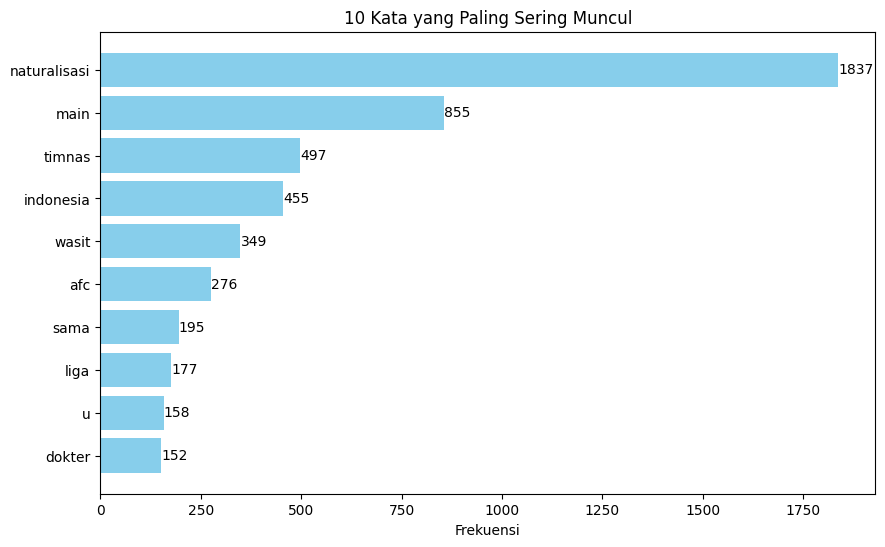

In [ ]:
#Menggunakan Matplotlib untuk Bar Chart (tambahan)
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Misalnya kolom 'tweet_clean' sudah berisi teks yang diproses
all_words = ' '.join(df['bersih']).split()
word_freq = Counter(all_words)

# Mengambil 20 kata yang paling sering muncul
most_common_words = word_freq.most_common(10)

# Memisahkan kata dan frekuensi untuk visualisasi
words, counts = zip(*most_common_words)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frekuensi')
plt.title('10 Kata yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalik urutan kata agar kata yang paling sering muncul di atas
for i, v in enumerate(counts):
    plt.text(v + 0.1, i, str(v), color='black', va='center', ha='left')
plt.show()

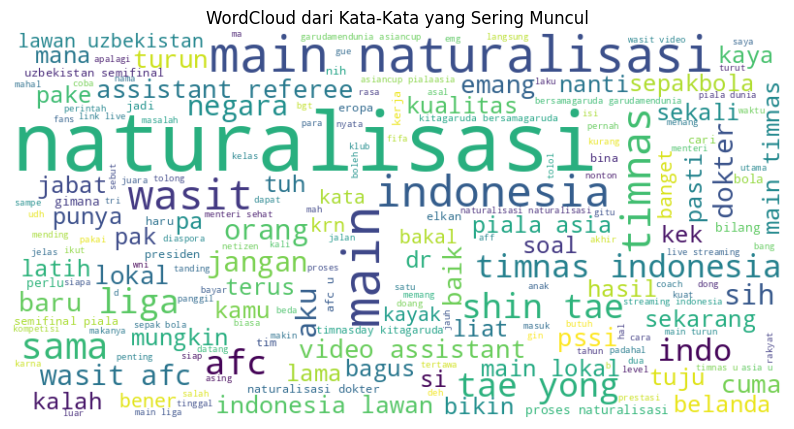

In [ ]:
#Menggunakan WordCloud untuk Visualisasi Kata (tambahan)
from wordcloud import WordCloud

# Gabungkan semua kata dalam kolom 'tweet_clean'
text = ' '.join(df['bersih'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kata-Kata yang Sering Muncul')
plt.show()

In [ ]:
df.head()

,full_text,sentimen,lower,h_angka,tokenizing,filtering,tweet_clean,stopwords,bersih
0,Banyangin kamu lagi gak enak badan. Terus Boom...,positif,banyangin kamu lagi gak enak badan. terus boom...,banyangin kamu lagi gak enak badan terus boome...,"[banyangin, kamu, lagi, gak, enak, badan, teru...",banyangin kamu lagi gak enak badan terus boome...,bayangin kamu lagi tidak enak badan terus boom...,bayangin kamu enak badan terus boomer boomer b...,bayangin kamu enak badan terus boomer boomer b...
1,Makin nyata terlihat ketololan bocah fomo timn...,positif,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,"[makin, nyata, terlihat, ketololan, bocah, fom...",makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,makin nyata terlihat ketololan bocah fomo timn...,makin nyata lihat tolol bocah fomo timnas main...
2,Jgn2 duitnya dibuat biayain timnas sebelum tik...,netral,jgn2 duitnya dibuat biayain timnas sebelum tik...,jgn duitnya dibuat biayain timnas sebelum tike...,"[jgn, duitnya, dibuat, biayain, timnas, sebelu...",jgn duitnya dibuat biayain timnas sebelum tike...,jangan duitnya dibuat biayain timnas sebelum t...,jangan duitnya dibuat biayain timnas tiket din...,jangan duit buat biayain timnas tiket dinaikin
3,Barangkali tujuan Menkes naturalisasi dokter b...,netral,barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menkes naturalisasi dokter b...,"[barangkali, tujuan, menkes, naturalisasi, dok...",barangkali tujuan menkes naturalisasi dokter b...,barangkali tujuan menteri kesehatan naturalisa...,barangkali tujuan menteri kesehatan naturalisa...,barangkali tuju menteri sehat naturalisasi dok...
4,Menkes mau naturalisasi dokter mau niru sistem...,positif,menkes mau naturalisasi dokter mau niru sistem...,menkes mau naturalisasi dokter mau niru sistem...,"[menkes, mau, naturalisasi, dokter, mau, niru,...",menkes mau naturalisasi dokter mau niru sistem...,menteri kesehatan mau naturalisasi dokter mau ...,menteri kesehatan naturalisasi dokter niru sis...,menteri sehat naturalisasi dokter niru sistem ...


In [ ]:
df.to_excel('asiancup2(Wasit AFC) fix.xlsx', index=False)